Q1. What is hypothesis testing in statistics?

Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It evaluates two competing hypotheses to determine if there is enough evidence to support a particular claim about a population.

Q2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
Null Hypothesis (H₀): A statement that there is no effect or no difference. It represents the status quo or default assumption.

Alternative Hypothesis (H₁ or Ha): A statement that contradicts the null hypothesis, suggesting there is an effect or a difference.

Difference: The null is tested directly, and if enough evidence is found, it is rejected in favor of the alternative.

Q3. What is the significance level in hypothesis testing, and why is it important?
The significance level (α) is the probability of rejecting the null hypothesis when it is actually true (Type I error). Common values are 0.05, 0.01, or 0.10.
It's important because it sets the threshold for decision-making—how much risk of error you're willing to accept.

Q4. What does a P-value represent in hypothesis testing?
The P-value is the probability of obtaining a test statistic as extreme as the one observed (or more) under the assumption that the null hypothesis is true.

Q5. How do you interpret the P-value in hypothesis testing?
If P ≤ α: Reject the null hypothesis (evidence supports the alternative).

If P > α: Do not reject the null hypothesis (insufficient evidence against it).



Q6. What are Type I and Type II errors in hypothesis testing?
Type I Error (False Positive): Rejecting the null hypothesis when it is actually true.

Type II Error (False Negative): Failing to reject the null hypothesis when it is actually false.

Q7. What is the difference between a one-tailed and a two-tailed test in hypothesis testing?
One-tailed test: Tests for a deviation in one specific direction (greater than or less than).

Two-tailed test: Tests for any significant difference, regardless of direction.



Q8. What is the Z-test, and when is it used in hypothesis testing?
A Z-test is used to determine if there is a significant difference between sample and population means or between two sample means when:

The population variance is known.

The sample size is large (n > 30).

Q9. How do you calculate the Z-score, and what does it represent in hypothesis testing?
Formula:
𝑍=𝑥ˉ−𝜇𝜎/𝑛Z= σ/ n
 
Where:


xˉ= sample mean
μ = population mean

σ = population standard deviation
n = sample size

The Z-score measures how many standard deviations a sample mean is from the population mean.



Q10. What is the T-distribution, and when should it be used instead of the normal distribution?
The T-distribution is used when:

The population standard deviation is unknown.

The sample size is small (n < 30).
It is wider than the normal distribution to account for more uncertainty.



Q11. What is the difference between a Z-test and a T-test?
Z-test: Known population standard deviation and large sample.

T-test: Unknown population standard deviation and/or small sample.

Q12. What is the T-test, and how is it used in hypothesis testing?
A T-test assesses whether the means of two groups are statistically different from each other. It is used when population variance is unknown.

Q13. What is the relationship between Z-test and T-test in hypothesis testing?
Both tests compare sample data to population parameters:

They are structurally similar but used under different assumptions.

The T-distribution approaches the Z-distribution as sample size increases.

Q14. What is a confidence interval, and how is it used to interpret statistical results?
A confidence interval (CI) gives a range of plausible values for a population parameter, calculated from sample data.
E.g., "95% CI" means we are 95% confident that the true value lies within that interval.



Q15. What is the margin of error, and how does it affect the confidence interval?
The margin of error is the range added/subtracted from the point estimate (like mean) to create the confidence interval.
Larger margin → wider interval → more uncertainty.

Q16. How is Bayes' Theorem used in statistics, and what is its significance?
Bayes' Theorem allows updating probabilities based on new evidence.
 
Used in machine learning, spam filters, and medical diagnosis.

Q17. What is the Chi-square distribution, and when is it used?
The Chi-square distribution is used in tests of categorical data, especially for:

Goodness-of-fit

Test of independence

It is always non-negative and skewed.

Q18. What is the Chi-square goodness of fit test, and how is it applied?
It checks whether a sample distribution matches an expected distribution.
Formula:

𝜒2=∑(𝑂𝑖−𝐸𝑖)2𝐸𝑖
Where 
𝑂𝑖O i= observed and 𝐸𝑖E i = expected values.



Q19. What is the F-distribution, and when is it used in hypothesis testing?
The F-distribution compares two variances and is used in ANOVA and F-tests.
It’s right-skewed and only positive.

Q20. What is an ANOVA test, and what are its assumptions?
ANOVA (Analysis of Variance) checks whether there are significant differences among 3 or more group means.
Assumptions:

Independence

Normality

Equal variances



Q21. What are the different types of ANOVA tests?
One-way ANOVA: One independent variable

Two-way ANOVA: Two independent variables

Repeated measures ANOVA: Same subjects used multiple times

MANOVA: Multivariate ANOVA (multiple dependent variables)

Q22. What is the F-test, and how does it relate to hypothesis testing?
The F-test assesses whether two population variances are significantly different. It is also the basis for the ANOVA test.
F = variance₁ / variance₂

PRACTICAL QUESTION

In [4]:
#Q1, Q3 – Z-test for comparing sample mean to known population mean:

import numpy as np
import scipy.stats as stats

def z_test(sample, pop_mean, pop_std):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed
    return z_score, p_value

In [5]:
#Q2 – Simulate random data & calculate P-value:

sample_data = np.random.normal(loc=52, scale=10, size=50)
pop_mean = 50
pop_std = 10
z_score, p_value = z_test(sample_data, pop_mean, pop_std)
print(f"Z-score: {z_score:.2f}, P-value: {p_value:.4f}")

Z-score: 2.16, P-value: 0.0309


In [6]:
#Q4 – Two-tailed Z-test visualization:

import matplotlib.pyplot as plt

def plot_z_decision_region(z_score, alpha=0.05):
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)

    critical = stats.norm.ppf(1 - alpha / 2)

    plt.plot(x, y, label='Standard Normal Curve')
    plt.fill_between(x, 0, y, where=(x <= -critical) | (x >= critical), color='red', alpha=0.3, label='Rejection Region')
    plt.axvline(z_score, color='blue', linestyle='--', label=f'Z = {z_score:.2f}')
    plt.title("Two-tailed Z-test Decision Region")
    plt.xlabel("Z-score")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
#Q5 – Visualize Type I and Type II errors:

def plot_type_errors(mu0, mu1, sigma, n, alpha=0.05):
    se = sigma / np.sqrt(n)
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)
    y0 = stats.norm.pdf(x, mu0, se)
    y1 = stats.norm.pdf(x, mu1, se)

    z_critical = stats.norm.ppf(1 - alpha/2)
    upper = mu0 + z_critical * se
    lower = mu0 - z_critical * se

    plt.plot(x, y0, label=f"H₀: μ={mu0}", color='blue')
    plt.plot(x, y1, label=f"H₁: μ={mu1}", color='green')
    plt.fill_between(x, 0, y0, where=(x < lower) | (x > upper), color='red', alpha=0.3, label='Type I Error (α)')
    plt.fill_between(x, 0, y1, where=(x > lower) & (x < upper), color='orange', alpha=0.3, label='Type II Error (β)')
    plt.axvline(lower, color='black', linestyle='--')
    plt.axvline(upper, color='black', linestyle='--')
    plt.legend()
    plt.title("Type I and Type II Errors")
    plt.xlabel("Sample Mean")
    plt.grid(True)
    plt.show()

In [9]:
#Q6 – Independent T-test:

def independent_t_test(group1, group2):
    t_stat, p_val = stats.ttest_ind(group1, group2)
    return t_stat, p_val
# Example usage of the independent T-test function 
g1 = np.random.normal(50, 10, 30)
g2 = np.random.normal(55, 10, 30)
t_stat, p_val = independent_t_test(g1, g2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


T-statistic: -1.76, P-value: 0.0845


Paired T-statistic: 6.44, P-value: 0.0000


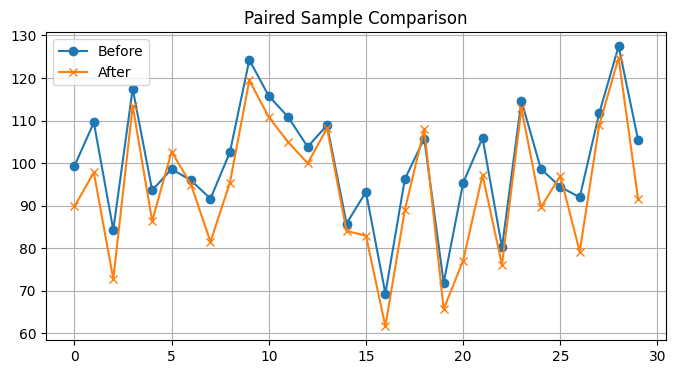

In [8]:
#Q7 – Paired T-test with visualization:

def paired_t_test(before, after):
    t_stat, p_val = stats.ttest_rel(before, after)
    return t_stat, p_val
 # Example usage of the paired T-test function
before = np.random.normal(100, 15, 30)
after = before - np.random.normal(5, 5, 30)  # simulate a treatment effect
t_stat, p_val = paired_t_test(before, after)
print(f"Paired T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

# Visualize
plt.figure(figsize=(8, 4))
plt.plot(before, label="Before", marker='o')
plt.plot(after, label="After", marker='x')
plt.title("Paired Sample Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
 #Q8 – Compare Z-test and T-test:

def compare_z_t(sample, pop_mean, pop_std):
    z_score, z_p = z_test(sample, pop_mean, pop_std)
    t_stat, t_p = stats.ttest_1samp(sample, pop_mean)
    return {
        "Z-test": {"z_score": z_score, "p_value": z_p},
        "T-test": {"t_stat": t_stat, "p_value": t_p}
    }

In [11]:
#Q9 – Confidence interval for sample mean:

def confidence_interval(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    sem = stats.sem(sample)
    margin = stats.t.ppf((1 + confidence) / 2, df=n-1) * sem
    return mean - margin, mean + margin, margin
# Example usage of the confidence interval function
ci_low, ci_high, margin = confidence_interval(sample_data)
print(f"95% Confidence Interval: ({ci_low:.2f}, {ci_high:.2f}), Margin of Error: ±{margin:.2f}")

95% Confidence Interval: (50.08, 56.03), Margin of Error: ±2.97


In [12]:
#Q10. Write a Python program to calculate the margin of error for a given confidence level using sample data
import numpy as np
from scipy import stats

def calculate_margin_of_error(data, confidence_level=0.95):
    """
    Calculate the margin of error for a given sample data and confidence level.

    Parameters:
    - data: list or numpy array of sample values
    - confidence_level: confidence level as a float (default: 0.95)

    Returns:
    - margin_of_error: float value of the margin of error
    """
    n = len(data)
    sample_mean = np.mean(data)
    sample_std_dev = np.std(data, ddof=1)
    standard_error = sample_std_dev / np.sqrt(n)
    
    # t critical value for two-tailed test
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    
    margin_of_error = t_critical * standard_error
    return margin_of_error

# Example usage
np.random.seed(0)
sample_data = np.random.normal(loc=100, scale=15, size=50)  # Mean=100, SD=15, N=50
confidence = 0.95

moe = calculate_margin_of_error(sample_data, confidence)
print(f"Margin of Error at {confidence*100}% confidence level: {moe:.2f}")


Margin of Error at 95.0% confidence level: 4.85


In [13]:
#11.Q11 Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process
def bayes_theorem(prior_A, prob_B_given_A, prob_B_given_not_A):
    """
    Calculate the posterior probability using Bayes' Theorem.

    Parameters:
    - prior_A: P(A), prior probability of hypothesis A
    - prob_B_given_A: P(B|A), probability of evidence B given A
    - prob_B_given_not_A: P(B|¬A), probability of B given not A

    Returns:
    - posterior_A_given_B: P(A|B), updated probability of A after seeing B
    """
    prob_not_A = 1 - prior_A
    prob_B = (prob_B_given_A * prior_A) + (prob_B_given_not_A * prob_not_A)

    posterior_A_given_B = (prob_B_given_A * prior_A) / prob_B
    return posterior_A_given_B

# Example scenario
# A = Has disease
# B = Test is positive
prior_A = 0.01              # P(A): 1% of population has disease
prob_B_given_A = 0.95       # P(B|A): 95% test accuracy when person has disease
prob_B_given_not_A = 0.05   # P(B|¬A): 5% false positive rate

posterior = bayes_theorem(prior_A, prob_B_given_A, prob_B_given_not_A)
print(f"Posterior Probability P(A|B): {posterior:.4f}")


Posterior Probability P(A|B): 0.1610


In [14]:
#Q12Perform a Chi-square test for independence between two categorical variables in Python
def bayes_theorem(prior_A, prob_B_given_A, prob_B_given_not_A):
    """
    Calculate the posterior probability using Bayes' Theorem.

    Parameters:
    - prior_A: P(A), prior probability of hypothesis A
    - prob_B_given_A: P(B|A), probability of evidence B given A
    - prob_B_given_not_A: P(B|¬A), probability of B given not A

    Returns:
    - posterior_A_given_B: P(A|B), updated probability of A after seeing B
    """
    prob_not_A = 1 - prior_A
    prob_B = (prob_B_given_A * prior_A) + (prob_B_given_not_A * prob_not_A)

    posterior_A_given_B = (prob_B_given_A * prior_A) / prob_B
    return posterior_A_given_B

# Example scenario
# A = Has disease
# B = Test is positive
prior_A = 0.01              # P(A): 1% of population has disease
prob_B_given_A = 0.95       # P(B|A): 95% test accuracy when person has disease
prob_B_given_not_A = 0.05   # P(B|¬A): 5% false positive rate

posterior = bayes_theorem(prior_A, prob_B_given_A, prob_B_given_not_A)
print(f"Posterior Probability P(A|B): {posterior:.4f}")


Posterior Probability P(A|B): 0.1610


In [15]:
#Q12Perform a Chi-square test for independence between two categorical variables in Python
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

# Step 1: Create a contingency table (example: Gender vs Product Preference)
# Rows: Gender (Male, Female)
# Columns: Preference (Product A, Product B)

data = {
    'Product A': [30, 20],  # [Male, Female]
    'Product B': [10, 40]
}

# Create DataFrame
contingency_table = pd.DataFrame(data, index=['Male', 'Female'])

# Step 2: Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Display Results
print("Contingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=['Male', 'Female'], columns=['Product A', 'Product B']))
print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Step 4: Interpretation
alpha = 0.05
if p < alpha:
    print("\n➡️ Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("\n✅ Fail to reject the null hypothesis: No significant association between the variables.")


Contingency Table:
        Product A  Product B
Male           30         10
Female         20         40

Expected Frequencies:
        Product A  Product B
Male         20.0       20.0
Female       30.0       30.0

Chi-square Statistic: 15.0417
Degrees of Freedom: 1
P-value: 0.0001

➡️ Reject the null hypothesis: There is a significant association between the variables.


In [16]:
#Q13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed 
#data 
import numpy as np
import pandas as pd

def calculate_expected_frequencies(observed):
    """
    Calculate expected frequencies for a Chi-square test.

    Parameters:
    - observed: 2D list or numpy array (contingency table)

    Returns:
    - expected: numpy array of expected frequencies
    """
    observed = np.array(observed)
    row_totals = observed.sum(axis=1).reshape(-1, 1)   # column vector
    col_totals = observed.sum(axis=0).reshape(1, -1)   # row vector
    grand_total = observed.sum()
    
    expected = (row_totals @ col_totals) / grand_total  # Matrix multiplication
    return expected

# Example observed data (contingency table)
# Rows: Gender [Male, Female]
# Columns: Product [A, B]
observed_data = [
    [30, 10],
    [20, 40]
]

# Calculate expected frequencies
expected_freq = calculate_expected_frequencies(observed_data)

# Display result as DataFrame
observed_df = pd.DataFrame(observed_data, index=['Male', 'Female'], columns=['Product A', 'Product B'])
expected_df = pd.DataFrame(expected_freq, index=['Male', 'Female'], columns=['Product A', 'Product B'])

print("Observed Frequencies:\n", observed_df)
print("\nExpected Frequencies:\n", expected_df.round(2))


Observed Frequencies:
         Product A  Product B
Male           30         10
Female         20         40

Expected Frequencies:
         Product A  Product B
Male         20.0       20.0
Female       30.0       30.0


In [17]:
#Q14.Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution
import numpy as np
from scipy.stats import chisquare

# Step 1: Define observed and expected frequencies
observed = np.array([45, 35, 20])           # Example observed frequencies
expected_proportions = np.array([0.4, 0.4, 0.2])  # Theoretical distribution proportions

# Step 2: Scale expected proportions to observed total count
total = observed.sum()
expected = expected_proportions * total

# Step 3: Perform Chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Step 4: Output results
print("Observed Frequencies:", observed)
print("Expected Frequencies:", expected.round(2))
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 5: Interpretation
alpha = 0.05
if p_value < alpha:
    print("\n➡️ Reject the null hypothesis: The data does NOT follow the expected distribution.")
else:
    print("\n✅ Fail to reject the null hypothesis: The data fits the expected distribution.")


Observed Frequencies: [45 35 20]
Expected Frequencies: [40. 40. 20.]
Chi-square Statistic: 1.2500
P-value: 0.5353

✅ Fail to reject the null hypothesis: The data fits the expected distribution.


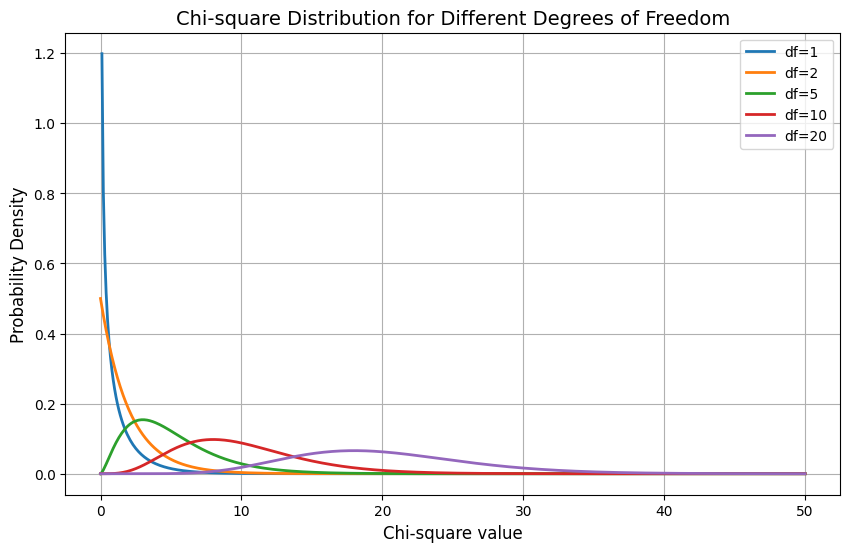

In [18]:
#Q15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Step 1: Define degrees of freedom for the Chi-square distribution
dfs = [1, 2, 5, 10, 20]

# Step 2: Plot Chi-square distributions for different degrees of freedom
x = np.linspace(0, 50, 500)
plt.figure(figsize=(10, 6))

for df in dfs:
    y = chi2.pdf(x, df)
    plt.plot(x, y, label=f'df={df}', linewidth=2)

# Step 3: Format the plot
plt.title("Chi-square Distribution for Different Degrees of Freedom", fontsize=14)
plt.xlabel("Chi-square value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Q16. Implement an F-test using Python to compare the variances of two random samplesD 
import numpy as np
from scipy.stats import f

def f_test(sample1, sample2, alpha=0.05):
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Ensure the larger variance is in the numerator
    if var1 > var2:
        f_stat = var1 / var2
        dfn, dfd = len(sample1) - 1, len(sample2) - 1
    else:
        f_stat = var2 / var1
        dfn, dfd = len(sample2) - 1, len(sample1) - 1

    p_value = 1 - f.cdf(f_stat, dfn, dfd)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("➡️ Reject the null hypothesis: Variances are significantly different.")
    else:
        print("✅ Fail to reject the null hypothesis: No significant difference in variances.")

# Example
np.random.seed(0)
sample1 = np.random.normal(60, 10, 30)
sample2 = np.random.normal(60, 15, 30)
f_test(sample1, sample2)





F-statistic: 1.5533
P-value: 0.1208
✅ Fail to reject the null hypothesis: No significant difference in variances.


One-Way ANOVA Results:

               sum_sq    df          F        PR(>F)
C(group)  1817.264830   2.0  40.975636  2.893768e-13
Residual  1929.220089  87.0        NaN           NaN

➡️ Reject the null hypothesis: At least one group mean is significantly different.


C:\Users\aman sinha\AppData\Local\Temp\ipykernel_2964\3365359170.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]


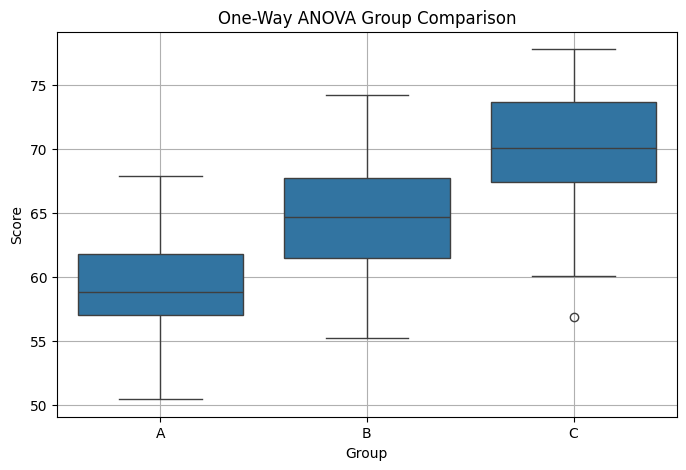

In [24]:

# Q17. Write a Python program to perform an ANOVA test to compare means between multiple groups and 
# interpret the results 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Step 1: Generate sample data for multiple groups
np.random.seed(42)
group_A = np.random.normal(loc=60, scale=5, size=30)
group_B = np.random.normal(loc=65, scale=5, size=30)
group_C = np.random.normal(loc=70, scale=5, size=30)

# Step 2: Create a DataFrame
data = pd.DataFrame({
    'score': np.concatenate([group_A, group_B, group_C]),
    'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Step 3: Fit the ANOVA model
model = ols('score ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Print ANOVA table
print("One-Way ANOVA Results:\n")
print(anova_table)

# Step 5: Interpretation
alpha = 0.05
p_value = anova_table["PR(>F)"][0]

if p_value < alpha:
    print("\n➡️ Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("\n✅ Fail to reject the null hypothesis: No significant difference in group means.")

# Step 6: Visualize the group comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='score', data=data)
plt.title("One-Way ANOVA Group Comparison")
plt.xlabel("Group")
plt.ylabel("Score")
plt.grid(True)
plt.show()





One-Way ANOVA Table:

               sum_sq    df          F    PR(>F)
C(group)  1303.950054   2.0  13.389885  0.000009
Residual  4236.169977  87.0        NaN       NaN

➡️ Reject H₀: At least one group mean is significantly different.


C:\Users\aman sinha\AppData\Local\Temp\ipykernel_2964\1883481405.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table['PR(>F)'][0]
C:\Users\aman sinha\AppData\Local\Temp\ipykernel_2964\1883481405.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='score', data=df, palette='Set2')


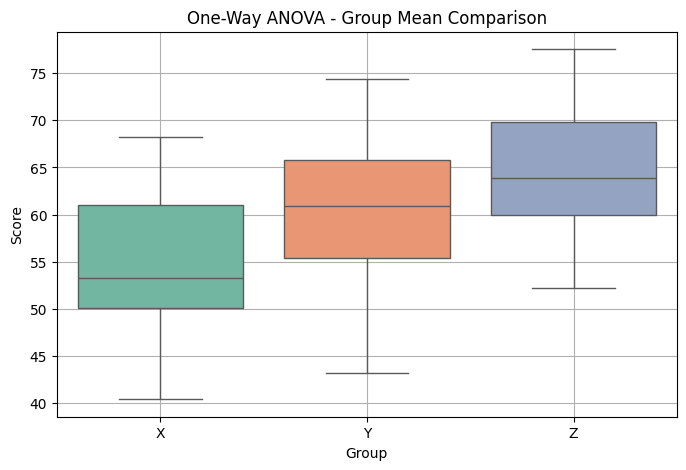

In [25]:

#Q18.Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Step 1: Simulate data for three groups
np.random.seed(123)
group_X = np.random.normal(loc=55, scale=6, size=30)
group_Y = np.random.normal(loc=60, scale=6, size=30)
group_Z = np.random.normal(loc=65, scale=6, size=30)

# Step 2: Combine into a DataFrame
df = pd.DataFrame({
    'score': np.concatenate([group_X, group_Y, group_Z]),
    'group': ['X'] * 30 + ['Y'] * 30 + ['Z'] * 30
})

# Step 3: Run the one-way ANOVA
model = ols('score ~ C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Display the results
print("One-Way ANOVA Table:\n")
print(anova_table)

# Step 5: Interpret the results
alpha = 0.05
p_val = anova_table['PR(>F)'][0]
if p_val < alpha:
    print("\n➡️ Reject H₀: At least one group mean is significantly different.")
else:
    print("\n✅ Fail to reject H₀: No significant difference between group means.")

# Step 6: Visualize the results
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='score', data=df, palette='Set2')
plt.title("One-Way ANOVA - Group Mean Comparison")
plt.xlabel("Group")
plt.ylabel("Score")
plt.grid(True)
plt.show()




In [26]:
#Q19.Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()
print("\nDescriptive Statistics by Group:")
print(data.groupby(group_var)[dependent_var].describe())
plt.hist(residuals, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()






NameError: name 'residuals' is not defined


📊 Two-Way ANOVA Results:
                                  sum_sq    df           F        PR(>F)
C(Income_Level)              1492.299313   1.0  216.234235  8.576340e-17
C(Location)                   303.548804   1.0   43.984235  1.002472e-07
C(Income_Level):C(Location)   178.564084   1.0   25.873943  1.152617e-05
Residual                      248.447131  36.0         NaN           NaN


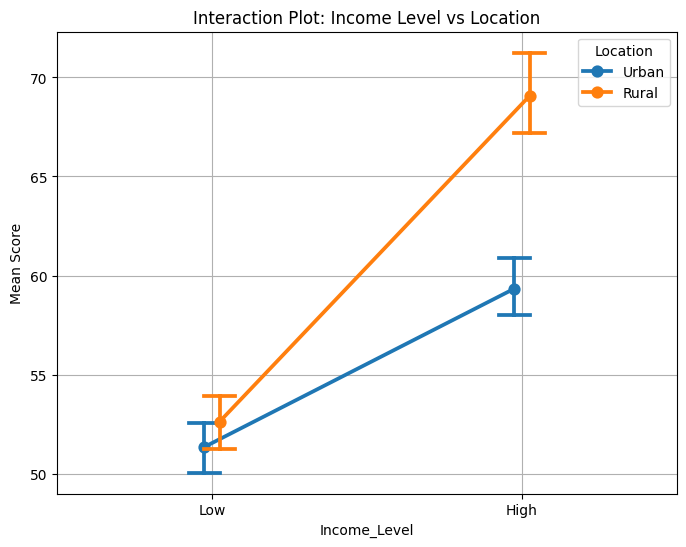

In [27]:
#Q20.Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the 
#results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ------------------------
# 1. Generate example data
# ------------------------
np.random.seed(42)
n = 10

factor_A = ['Low', 'High']
factor_B = ['Urban', 'Rural']

data = []

for a in factor_A:
    for b in factor_B:
        base = 50
        if a == 'High':
            base += 10
        if b == 'Rural':
            base += 5
        if a == 'High' and b == 'Rural':
            base += 5  # interaction effect
        scores = base + np.random.normal(0, 3, n)
        for score in scores:
            data.append([score, a, b])

df = pd.DataFrame(data, columns=['Score', 'Income_Level', 'Location'])

# -----------------------------
# 2. Perform Two-Way ANOVA
# -----------------------------
model = ols('Score ~ C(Income_Level) + C(Location) + C(Income_Level):C(Location)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n📊 Two-Way ANOVA Results:")
print(anova_table)

# -----------------------------
# 3. Visualize the interaction
# -----------------------------
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Income_Level', y='Score', hue='Location', capsize=.1, dodge=True, markers='o')
plt.title("Interaction Plot: Income Level vs Location")
plt.ylabel("Mean Score")
plt.grid(True)
plt.show()


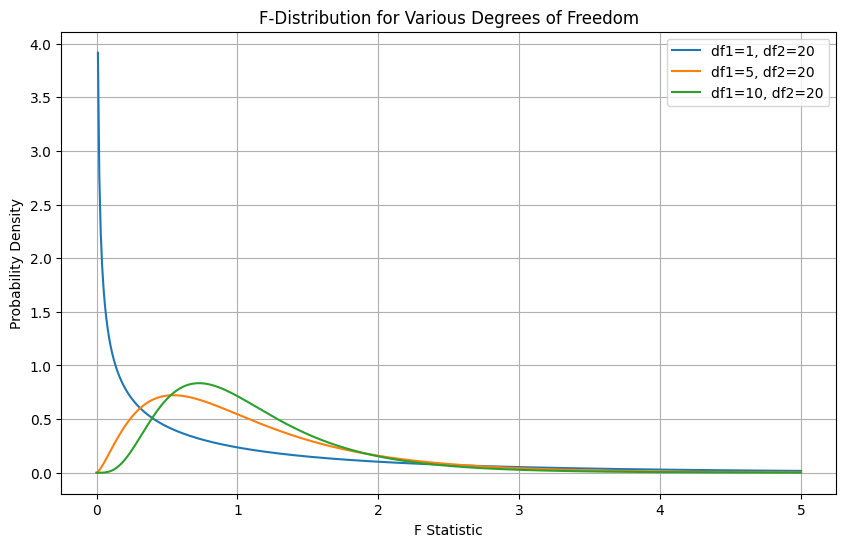

In [29]:
#Q21.Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Define F-distribution parameters
x = np.linspace(0, 5, 500)
df1_values = [1, 5, 10]  # numerator degrees of freedom
df2 = 20  # denominator degrees of freedom

# Plot F-distributions
plt.figure(figsize=(10, 6))
for df1 in df1_values:
    y = f.pdf(x, df1, df2)
    plt.plot(x, y, label=f'df1={df1}, df2={df2}')

plt.title('F-Distribution for Various Degrees of Freedom')
plt.xlabel('F Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


📊 One-Way ANOVA Results:
F-Statistic = 61.7003
P-Value = 2.0727e-17


C:\Users\aman sinha\AppData\Local\Temp\ipykernel_2964\3105578320.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='Score', palette='Set2')


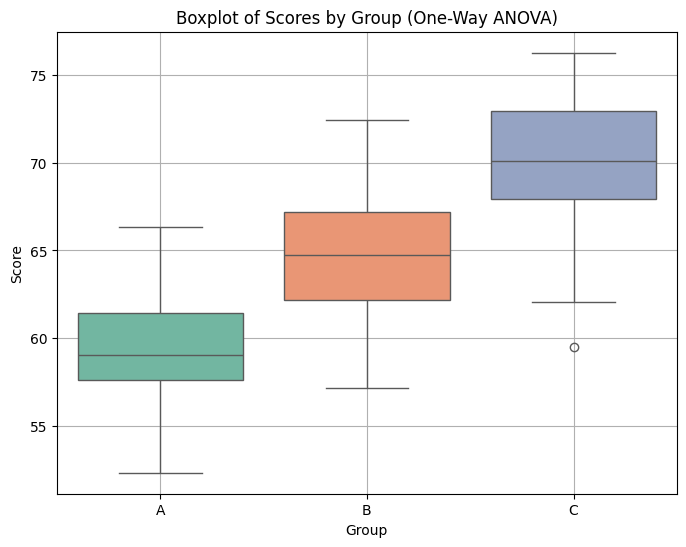

✅ The p-value is less than 0.05. There is a significant difference between at least two group means.


In [30]:

#Q22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group mean Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means . 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Step 1: Simulate normally distributed data
np.random.seed(42)
group_A = np.random.normal(loc=60, scale=4, size=30)
group_B = np.random.normal(loc=65, scale=4, size=30)
group_C = np.random.normal(loc=70, scale=4, size=30)

# Combine into a DataFrame
df = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Step 2: Perform One-Way ANOVA
f_stat, p_value = f_oneway(group_A, group_B, group_C)
print("📊 One-Way ANOVA Results:")
print(f"F-Statistic = {f_stat:.4f}")
print(f"P-Value = {p_value:.4e}")

# Step 3: Boxplot to visualize group mean comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Group', y='Score', palette='Set2')
plt.title("Boxplot of Scores by Group (One-Way ANOVA)")
plt.ylabel("Score")
plt.xlabel("Group")
plt.grid(True)
plt.show()

# Step 4: Interpretation
if p_value < 0.05:
    print("✅ The p-value is less than 0.05. There is a significant difference between at least two group means.")
else:
    print("❌ The p-value is greater than 0.05. No significant difference found between group means.")


In [32]:

#Q23. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results
import numpy as np
from scipy.stats import chi2

# Step 1: Simulate a sample
np.random.seed(123)
sample = np.random.normal(loc=100, scale=12, size=30)  # σ = 12

# Step 2: Sample statistics
n = len(sample)
sample_var = np.var(sample, ddof=1)  # unbiased estimator
claimed_var = 144  # claimed population variance (σ₀²)

# Step 3: Calculate Chi-Square statistic
chi2_stat = (n - 1) * sample_var / claimed_var

# Step 4: Find critical values for two-tailed test at α = 0.05
alpha = 0.05
chi2_critical_low = chi2.ppf(alpha / 2, df=n - 1)
chi2_critical_high = chi2.ppf(1 - alpha / 2, df=n - 1)

# Step 5: P-value
p_value = 2 * min(chi2.cdf(chi2_stat, df=n - 1), 1 - chi2.cdf(chi2_stat, df=n - 1))

# Output
print("📊 Chi-Square Test for Population Variance")
print(f"Sample Variance = {sample_var:.4f}")
print(f"Chi-Square Statistic = {chi2_stat:.4f}")
print(f"Critical Region = ({chi2_critical_low:.4f}, {chi2_critical_high:.4f})")
print(f"P-Value = {p_value:.4f}")

# Step 6: Conclusion
if chi2_stat < chi2_critical_low or chi2_stat > chi2_critical_high:
    print("✅ Reject the null hypothesis: Sample variance differs from the claimed variance.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in variance.")


📊 Chi-Square Test for Population Variance
Sample Variance = 202.9601
Chi-Square Statistic = 40.8739
Critical Region = (16.0471, 45.7223)
P-Value = 0.1413
❌ Fail to reject the null hypothesis: No significant difference in variance.


In [33]:

#Q24. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Example data
success_a = 56  # number of successes in group A
size_a = 100    # sample size of group A

success_b = 68  # number of successes in group B
size_b = 120    # sample size of group B

# Z-test for two proportions
count = np.array([success_a, success_b])
nobs = np.array([size_a, size_b])

z_stat, p_val = proportions_ztest(count, nobs)

# Output
print("📊 Z-Test for Comparing Two Proportions")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("✅ Reject the null hypothesis: Significant difference in proportions.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in proportions.")



📊 Z-Test for Comparing Two Proportions
Z-statistic: -0.0993
P-value: 0.9209
❌ Fail to reject the null hypothesis: No significant difference in proportions.


In [34]:

#Q25. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Example data
success_a = 56  # number of successes in group A
size_a = 100    # sample size of group A

success_b = 68  # number of successes in group B
size_b = 120    # sample size of group B

# Z-test for two proportions
count = np.array([success_a, success_b])
nobs = np.array([size_a, size_b])

z_stat, p_val = proportions_ztest(count, nobs)

# Output
print("📊 Z-Test for Comparing Two Proportions")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("✅ Reject the null hypothesis: Significant difference in proportions.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in proportions.")


📊 Z-Test for Comparing Two Proportions
Z-statistic: -0.0993
P-value: 0.9209
❌ Fail to reject the null hypothesis: No significant difference in proportions.


📊 Chi-Square Goodness-of-Fit Test
Observed Frequencies: [40 35 25]
Expected Frequencies: [33.33333333 33.33333333 33.33333333]
Chi-square Statistic: 3.5000
P-value: 0.1738
❌ Fail to reject the null hypothesis: Data fits the expected distribution.


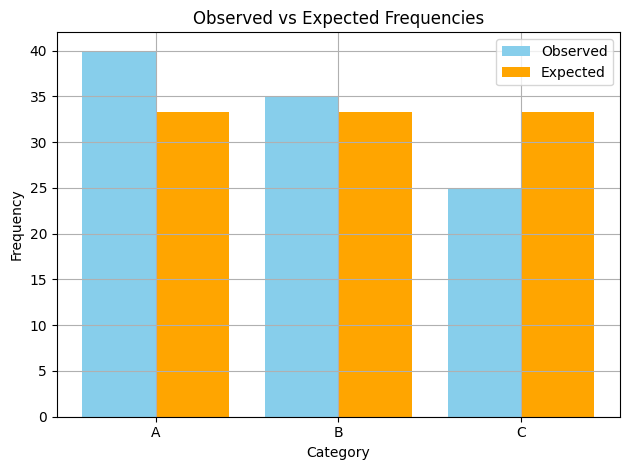

In [37]:

#Q26.Perform a Chi-square test for goodness of fit with simulated data and analyze the results.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Step 1: Simulate observed data
np.random.seed(42)
observed = np.array([40, 35, 25])  # e.g., counts of categories A, B, C

# Step 2: Define expected frequencies (e.g., uniform distribution)
total = np.sum(observed)
expected = np.array([total / 3] * 3)

# Step 3: Perform Chi-square goodness-of-fit test
chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

# Step 4: Display results
print("📊 Chi-Square Goodness-of-Fit Test")
print(f"Observed Frequencies: {observed}")
print(f"Expected Frequencies: {expected}")
print(f"Chi-square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Reject the null hypothesis: Data does NOT fit the expected distribution.")
else:
    print("❌ Fail to reject the null hypothesis: Data fits the expected distribution.")

# Step 5: Visualize
categories = ['A', 'B', 'C']
x = np.arange(len(categories))

plt.bar(x - 0.2, observed, width=0.4, label='Observed', color='skyblue')
plt.bar(x + 0.2, expected, width=0.4, label='Expected', color='orange')
plt.xticks(x, categories)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
